In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [231]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.python.keras.applications.resnet import ResNet50

In [232]:
print(os.listdir('/Users/user/Downloads/Face Mask Dataset'))

['Test', 'Train', 'Validation']


In [149]:
Mask_train='C:/Users/user/Downloads/Face Mask Dataset/Train'
Mask_test='C:/Users/user/Downloads/Face Mask Dataset/Test'
Mask_validation='C:/Users/user/Downloads/Face Mask Dataset/Validation'

In [150]:
images_train=os.listdir(Mask_train)
images_train

['WithMask', 'WithoutMask']

In [151]:
images_test=os.listdir(Mask_test)
images_test

['WithMask', 'WithoutMask']

In [233]:
with_mask='C:/Users/user/Downloads/Face Mask Dataset/Train/WithMask'
without_mask='C:/Users/user/Downloads/Face Mask Dataset/Train/WithoutMask'

In [234]:
from sklearn.utils import shuffle
image_mask = []
target_mask = []
for i in os.listdir(with_mask):
    pic = os.path.join(with_mask + "/", i)
    image_mask.append(pic)
    target_mask.append("maskpath")   

image_no_mask = []
target_no_mask = []
for i in os.listdir(without_mask):
    pic = os.path.join(without_mask + "/", i)
    image_no_mask.append(pic)
    target_no_mask.append("without_mask")

mask = pd.DataFrame()
mask["image"] = image_mask
mask["face"] = target_mask

no_mask = pd.DataFrame()
no_mask["image"] = image_no_mask
no_mask["face"] = target_no_mask

data = pd.concat([mask, no_mask], axis = 0, ignore_index = True)
data = shuffle(data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='face', ylabel='count'>

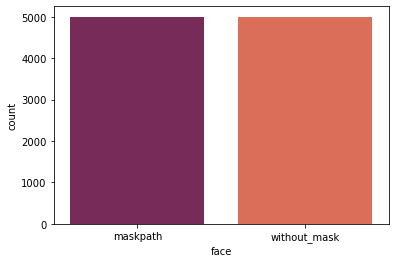

In [250]:
sns.countplot(data["face"],palette='rocket')


In [236]:
print(f"With Mask:", data.value_counts("face")[0])
print(f"Without Mask:", data.value_counts("face")[1])

With Mask: 5000
Without Mask: 5000


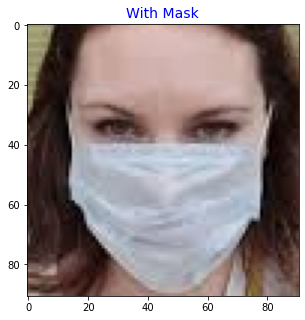

In [237]:
plt.figure(figsize=(12,5))
image_withmask = load_img(mask["image"][121])
plt.imshow(image_withmask,cmap='viridis')
plt.title("With Mask", color = "blue", size = 14)
plt.show()

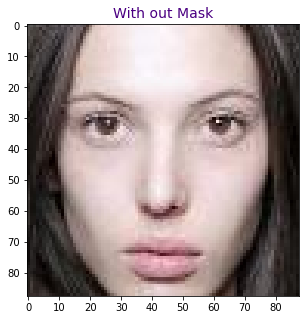

In [238]:
plt.figure(figsize=(12,5))
image_without_mask = load_img(no_mask["image"][44])
plt.imshow(image_without_mask,cmap='viridis')
plt.title("With out Mask", color = "indigo", size = 14)
plt.show()

Train and Test pictures




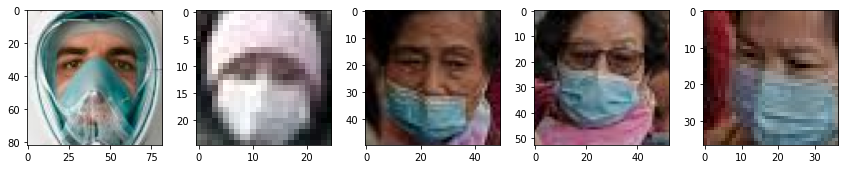

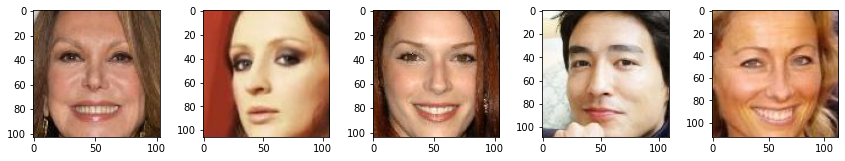

In [239]:
nomask='C:/Users/user/Downloads/Face Mask Dataset/Train'
print('Train and Test pictures')
plot_images(nomask+'/WithMask')
print()
nomask='C:/Users/user/Downloads/Face Mask Dataset/Train'
plot_images(nomask+'/WithoutMask')
print()


In [240]:
Mask_pics = os.listdir('C:/Users/user/Downloads/Face Mask Dataset/Train')
for mask in Mask_pics:
    count = len(os.listdir(f'C:/Users/user/Downloads/Face Mask Dataset/Train/{mask}'))
    print(f'{mask} faces in Train data={count}')

WithMask faces in Train data=5000
WithoutMask faces in Train data=5000


In [241]:
without_Mask_pics = os.listdir('C:/Users/user/Downloads/Face Mask Dataset/Test')
for no_mask in without_Mask_pics:
    count = len(os.listdir(f'C:/Users/user/Downloads/Face Mask Dataset/Train/{no_mask}'))
    print(f'{no_mask} faces in Test data={count}')

WithMask faces in Test data=5000
WithoutMask faces in Test data=5000


In [242]:
batch_size = 32
target_size = (128,128)

Mask_train_datagen = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True, zoom_range=0.2,shear_range=0.2)


Face_train_generator = Mask_train_datagen.flow_from_directory(
       directory=Mask_train,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Mask_val_datagen=ImageDataGenerator(rescale=1.0/255)

Face_val_generator = Mask_train_datagen.flow_from_directory(
        directory=Mask_validation,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Mask_test_datagen   = ImageDataGenerator(rescale=1.0/255)
Face_test_generator = Mask_train_datagen.flow_from_directory(
        Mask_test,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [243]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [247]:
#VGG19
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
vgg_model = Sequential()
vgg_model.add(vgg19)
vgg_model.add(Flatten())
vgg_model.add(Dense(2,activation='sigmoid'))
vgg_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_19 (Dense)            (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [248]:
vgg_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [265]:
vgg_history = vgg_model.fit_generator(generator=Face_train_generator,
                              steps_per_epoch=len(Face_train_generator)//32,
                              epochs=10,validation_data=Face_val_generator,
                              validation_steps=len(Face_val_generator)//32)

C:\Users\user\AppData\Local\Temp/ipykernel_11120/1567117789.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_history = vgg_model.fit_generator(generator=Face_train_generator,


Epoch 1/10
9/9 [==============================] - 53s 6s/step - loss: 0.0593 - accuracy: 0.9826
Epoch 2/10
9/9 [==============================] - 53s 6s/step - loss: 0.0432 - accuracy: 0.9896
Epoch 3/10
9/9 [==============================] - 49s 5s/step - loss: 0.0554 - accuracy: 0.9861
Epoch 4/10
9/9 [==============================] - 55s 6s/step - loss: 0.0583 - accuracy: 0.9826
Epoch 5/10
9/9 [==============================] - 54s 6s/step - loss: 0.0741 - accuracy: 0.9792
Epoch 6/10
9/9 [==============================] - 53s 6s/step - loss: 0.0520 - accuracy: 0.9896
Epoch 7/10
9/9 [==============================] - 55s 6s/step - loss: 0.0734 - accuracy: 0.9722
Epoch 8/10
9/9 [==============================] - 47s 5s/step - loss: 0.0378 - accuracy: 0.9965
Epoch 9/10
9/9 [==============================] - 32s 4s/step - loss: 0.0740 - accuracy: 0.9688
Epoch 10/10
9/9 [==============================] - 32s 4s/step - loss: 0.0376 - accuracy: 0.9965


In [266]:
vgg_score = vgg_model.evaluate(Face_val_generator) 


25/25 [==============================] - 84s 3s/step - loss: 0.0554 - accuracy: 0.9762


In [267]:
print('Test loss: ', vgg_score[0])
print('Test accuracy: ', vgg_score[1]*100)

Test loss:  0.055371351540088654
Test accuracy:  97.62499928474426


<AxesSubplot:>

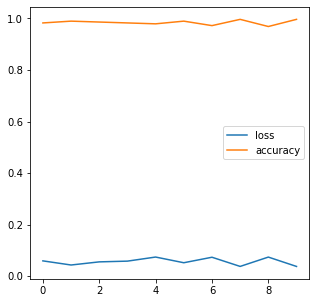

In [310]:
pd.DataFrame(vgg_history.history).plot(figsize=(5,5))

In [255]:
#CNN
input_data = Input(shape=(128, 128, 3))

model_cnn = Conv2D(32, (3, 3), activation="relu")(input_data)
model_cnn = MaxPooling2D(pool_size = (4, 4), strides=(4, 4))(model_cnn)
model_cnn = Dropout(0.25)(model_cnn)

model_cnn= Conv2D(32, (3, 3), activation="relu")(model_cnn)
model_cnn = MaxPooling2D(pool_size = (2, 2))(model_cnn)
model_cnn = Dropout(0.3)(model_cnn)


model_cnn= Conv2D(32, (3, 3), activation='relu')(model_cnn)
model_cnn= MaxPooling2D(pool_size=(2, 2))(model_cnn)
model_cnn = Dropout(0.3)(model_cnn)

model_cnn = Flatten()(model_cnn)

model_cnn = Dense(128, activation = 'relu')(model_cnn)
output = Dense(1, activation = 'sigmoid')(model_cnn)

cnn = Model(inputs=input_data, outputs=output)


cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [256]:
cnn.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                      

In [257]:
history = cnn.fit(Face_train_generator,epochs = 10, batch_size=32,validation_data = Face_val_generator)

Epoch 1/10
313/313 [==============================] - 230s 731ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
313/313 [==============================] - 220s 703ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
313/313 [==============================] - 218s 697ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
313/313 [==============================] - 220s 702ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
313/313 [==============================] - 226s 722ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
313/313 [==============================] - 212s 676ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
313/313 [==============================] - 212s 678ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 -

In [262]:
cnn_score = cnn.evaluate(Face_val_generator) 


25/25 [==============================] - 12s 479ms/step - loss: 0.6931 - accuracy: 0.5000


In [275]:
print('Test accuracy: ', cnn_score[1]*100)

Test accuracy:  50.0


In [277]:
y_pred = cnn.predict(Face_val_generator)

In [227]:
#Resnet50


def build_model(resnet):
    input_data = Input(shape=(128, 128, 3))
    x = resnet(input_data)
    x = GlobalMaxPooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128,activation='relu')(x) 
    output = Dense(1, activation='sigmoid')(x)
    
    resnet_model = Model(inputs=input_data, outputs=output)
    
    resnet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return resnet_model

In [228]:
resnet = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (128, 128, 3))
resnet.trainable = False
model = build_model(resnet)
model.summary()

94773248/94765736 [==============================] - 11s 0us/step
  <tf.Variable 'conv1_bn/beta:0' shape=(64,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'conv2_block1_1_bn/beta:0' shape=(64,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'conv2_block1_2_bn/beta:0' shape=(64,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'conv2_block1_0_bn/beta:0' shape=(256,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'conv2_block1_3_bn/beta:0' shape=(256,) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.
  <tf.Variable 'conv2_block2_1_bn/beta:0' shape=(64,) dtype=float32>. This is a strong indication that the Lambda layer should

In [229]:
history = model.fit(Face_train_generator,epochs = 10, batch_size=32,validation_data = Face_val_generator)

Epoch 1/10
313/313 [==============================] - 409s 1s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
313/313 [==============================] - 428s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 3/10
313/313 [==============================] - 502s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 4/10
313/313 [==============================] - 548s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
313/313 [==============================] - 1007s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
313/313 [==============================] - 659s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/10
313/313 [==============================] - 648s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.500

In [291]:
ResNet_score = model.evaluate(Face_val_generator) 


25/25 [==============================] - 90s 4s/step - loss: 0.2258 - accuracy: 0.9112


In [296]:
print('Test loss: ', ResNet_score[0])
print('Test accuracy: ', ResNet_score[1]*100)

Test loss:  0.22580207884311676
Test accuracy:  91.12499952316284


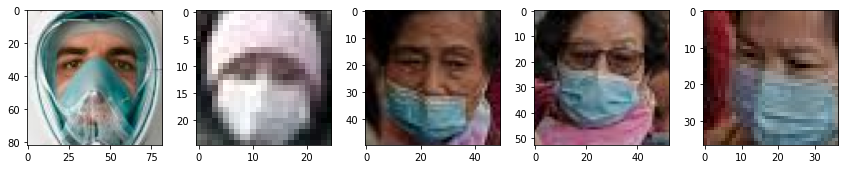

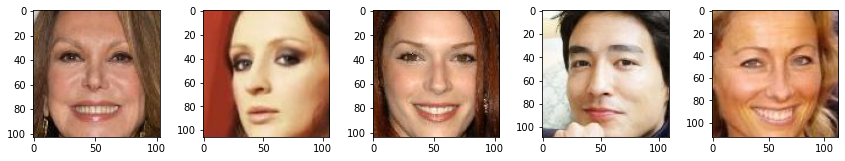

In [309]:
plot_images(mask+'/WithMask')
plt.show
plot_images(nomask+'/WithoutMask')
